In [ ]:
# Imageによる画像読み込み
from PIL import Image
import numpy as np
image = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/lion.jpg'))

# 読み込み時にndarray型にする
print(type(image))
print(image.dtype)

print(image.shape)  # （行, 列, 色）の３次元配列が得られます。色はRGBなので3

# 白黒化
image_mono = np.array((Image.open('/content/drive/MyDrive/Colab Notebooks/lion.jpg')).convert('L'))
print(image_mono.shape)

PIL_image = Image.fromarray(image_mono)  # ndarray型→Image型
print(type(PIL_image))

# 画像の保存
PIL_image.save('/content/drive/MyDrive/Colab Notebooks/lion_mono.jpg')

<class 'numpy.ndarray'>
uint8
(256, 384, 3)
(256, 384)
<class 'PIL.Image.Image'>


In [ ]:
# google.colabによる画像アップロード
from google.colab import files
uploaded_file = files.upload()

# 辞書型uploaded_fileの最初のキー(ファイル名)を代入
uploaded_file_name = next(iter(uploaded_file))
print(uploaded_file_name)

Saving 458001.jpg to 458001.jpg
458001.jpg


<class 'numpy.ndarray'>


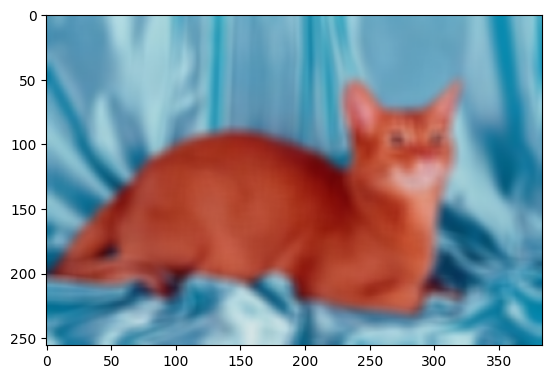

In [ ]:
# OpenCVによる画像読み込み
import cv2
orig = cv2.imread(uploaded_file_name)

# BGR→RGBに変換(順番入れ替え,OpenCVの仕様)
src = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

# OpenCVの読み込みはunit8のndarray型になる
print(type(src))

# matplotlibによる画像表示
from matplotlib import pyplot as plt
plt.imshow(src)

# OpenCVによる画像処理(ブラー)
blurred = cv2.blur(src, (10, 10))
plt.imshow(blurred)


array([[[18,  0,  0],
        [21,  0,  0],
        [27,  0,  0],
        ...,
        [19,  0,  0],
        [22,  0,  0],
        [25,  0,  0]],

       [[19,  0,  0],
        [23,  0,  0],
        [27,  0,  0],
        ...,
        [19,  0,  0],
        [22,  0,  0],
        [25,  0,  0]],

       [[25,  0,  0],
        [27,  0,  0],
        [27,  0,  0],
        ...,
        [20,  0,  0],
        [23,  0,  0],
        [26,  0,  0]],

       ...,

       [[26,  0,  0],
        [25,  0,  0],
        [23,  0,  0],
        ...,
        [43,  0,  0],
        [51,  0,  0],
        [45,  0,  0]],

       [[20,  0,  0],
        [19,  0,  0],
        [18,  0,  0],
        ...,
        [28,  0,  0],
        [45,  0,  0],
        [48,  0,  0]],

       [[13,  0,  0],
        [14,  0,  0],
        [15,  0,  0],
        ...,
        [32,  0,  0],
        [37,  0,  0],
        [32,  0,  0]]], dtype=uint8)
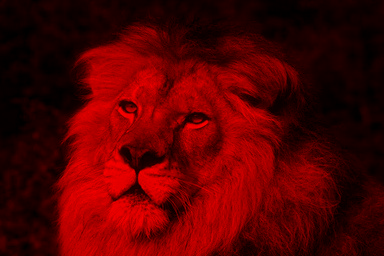

In [ ]:
from PIL import Image
import numpy as np
image = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/lion.jpg'))

# 赤以外を0に
image_Red = image.copy()
image_Red[:, :, 1] = 0
image_Red[:, :, 2] = 0

PIL_image = Image.fromarray(image_Red)
PIL_image.save('/content/drive/MyDrive/Colab Notebooks/lion_red.jpg')
display(image_Red)

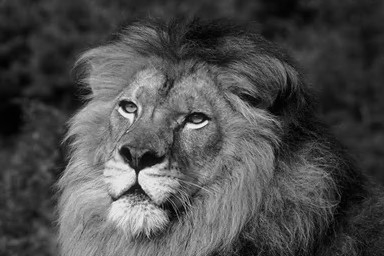

In [ ]:
# 輝度法による白黒化
import numpy as np
from PIL import Image
image = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/lion.jpg'))

# 出力用の配列の用意
image_gray = np.copy(image[:,:,0])
# float型に変換
pixel = np.array(image,dtype = 'float32')
# 輝度法によるグレースケール化
# image_gray = pixel[:,:,0] * 0.21 + pixel[:,:,1] * 0.72 + pixel[:,:,2] * 0.07 を行列積で
image_gray = np.dot(pixel[:,:,:], [0.21, 0.72, 0.07])

# unit8型へもどす
image_gray = image_gray.astype(np.uint8)
# image型にもどす
PIL_image = Image.fromarray(image_gray)
# 表示
display(PIL_image)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
(256, 384)
(254, 382)


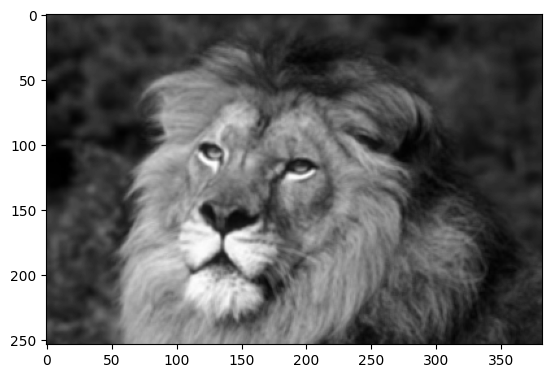

In [ ]:
import numpy as np
from PIL import Image
# 平滑化フィルタの設定
f = np.ones((3,3))/9
print(f)


# 画像処理をするためにunit8→float32に型変換
pixels = np.array(image_gray, dtype = 'float32')
# 出力用の配列
image_flat = np.zeros((pixels.shape[0] - 2, pixels.shape[1] - 2))

for i in range(1, pixels.shape[0] - 1):
    for j in range(1, pixels.shape[1] - 1):
        image_flat[i - 1][j - 1] += np.sum(pixels[i - 1:i + 2,j - 1:j + 2] * f)

image_flat = image_flat.astype(np.uint8)
from matplotlib import pyplot as plt
plt.imshow(image_flat, cmap = 'gray')

[[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]


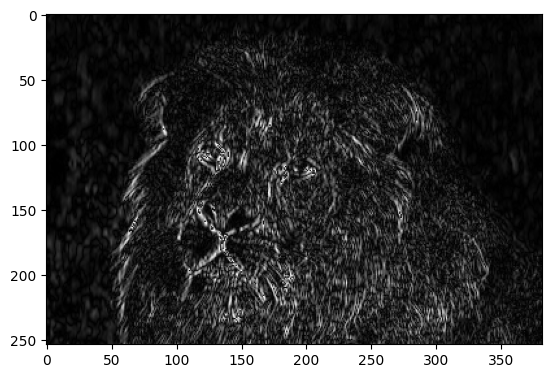

In [ ]:
import numpy as np
from PIL import Image
# 差分フィルタの設定
f = [[-1,0,1],[-1,0,1],[-1,0,1]]
print(f)
f2 = [[-1,-1,-1],[0,0,0],[1,1,1]]


# 画像処理をするためにunit8→float32に型変換
pixels = np.array(image_gray, dtype = 'float32')
# 出力用の配列
image_flat = np.zeros((pixels.shape[0] - 2, pixels.shape[1] - 2))

for i in range(1, pixels.shape[0] - 1):
    for j in range(1, pixels.shape[1] - 1):
        image_flat[i - 1][j - 1] += np.sum(pixels[i - 1:i + 2,j - 1:j + 2] * f)

# 差分フィルタは正負があるので絶対値を取る
image_flat = abs(image_flat)
image_flat = image_flat.astype(np.uint8)
from matplotlib import pyplot as plt
plt.imshow(image_flat, cmap = 'gray')